In [2]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt

from functions import *

2024-11-04 11:22:55.521209: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 11:22:55.911915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 11:22:55.913781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 11:22:58.746824: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#Paso temporal
#dt = 0.1

#Vector de tiempos
#t = np.arange(0,10,dt)

# choose a number of time steps
look_back = 5

# Cantidad de valores por cada paso temporal
n_features = 1

# Proporcion entre train y test
proporcion = 0.75

# Cantidad de pasos que queremos predecir hacia adelante
pasos_adelante = 100
indice_inicial = 0


In [18]:
# Generamos la señal temporal
#raw_seq = np.sin(2*np.pi * 2 * t) + 0.5 * np.sin(2*np.pi * t)#+np.cos(2*np.pi * 3 * t)


# Parameters for the Rössler attractor
a = 0.2
b = 0.2
c = 5.7

# Time step and number of steps
dt = 0.1
num_steps = 2000

#Vector de tiempos
#t = np.linspace(0,dt*num_steps,num_steps+1)
t = np.arange(0, num_steps * dt, dt)

# Generate the time sequence for the Rössler attractor
raw_seq, _, _ = rossler_attractor(a, b, c, dt, num_steps)
# Maximo de la señal para normalizar
maximo = np.max(np.abs(raw_seq))
# Normalizamos
raw_seq = raw_seq/maximo

raw_seq = raw_seq[400:]
t = t[400:]
print()

filter_seq = int(len(raw_seq)/2 + 2*pasos_adelante) 

raw_seq_1 = raw_seq[:filter_seq]
t_1 = t[:filter_seq]

raw_seq_2 = raw_seq[len(t)-filter_seq:]
t_2 = t[len(t)-filter_seq:]

raw_seq_2_bw = raw_seq_2[::-1]
t_2_bw = t_2[::-1]


2001
[0.000e+00 1.000e-01 2.000e-01 ... 1.998e+02 1.999e+02 2.000e+02]
2000
[0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]



In [34]:
print(len(t_2))
print(len(t_1))
print(len(t))

1000
1000
1600


In [27]:
print(t_2)


[100.  100.1 100.2 100.3 100.4 100.5 100.6 100.7 100.8 100.9 101.  101.1
 101.2 101.3 101.4 101.5 101.6 101.7 101.8 101.9 102.  102.1 102.2 102.3
 102.4 102.5 102.6 102.7 102.8 102.9 103.  103.1 103.2 103.3 103.4 103.5
 103.6 103.7 103.8 103.9 104.  104.1 104.2 104.3 104.4 104.5 104.6 104.7
 104.8 104.9 105.  105.1 105.2 105.3 105.4 105.5 105.6 105.7 105.8 105.9
 106.  106.1 106.2 106.3 106.4 106.5 106.6 106.7 106.8 106.9 107.  107.1
 107.2 107.3 107.4 107.5 107.6 107.7 107.8 107.9 108.  108.1 108.2 108.3
 108.4 108.5 108.6 108.7 108.8 108.9 109.  109.1 109.2 109.3 109.4 109.5
 109.6 109.7 109.8 109.9 110.  110.1 110.2 110.3 110.4 110.5 110.6 110.7
 110.8 110.9 111.  111.1 111.2 111.3 111.4 111.5 111.6 111.7 111.8 111.9
 112.  112.1 112.2 112.3 112.4 112.5 112.6 112.7 112.8 112.9 113.  113.1
 113.2 113.3 113.4 113.5 113.6 113.7 113.8 113.9 114.  114.1 114.2 114.3
 114.4 114.5 114.6 114.7 114.8 114.9 115.  115.1 115.2 115.3 115.4 115.5
 115.6 115.7 115.8 115.9 116.  116.1 116.2 116.3 11

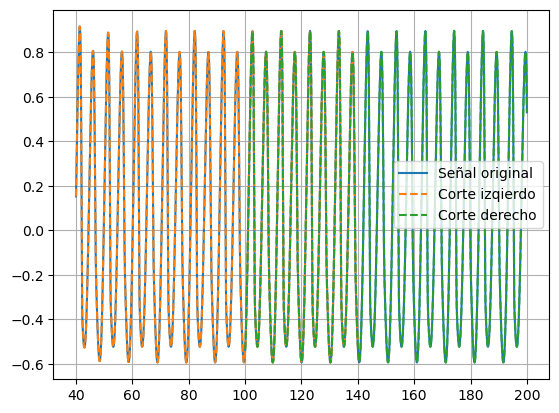

In [19]:
plt.plot(t,raw_seq, label='Señal original')
plt.plot(t_1,raw_seq_1, '--', label='Corte izqierdo')
plt.plot(t_2,raw_seq_2, '--', label='Corte derecho')
plt.grid()
plt.legend()
plt.show()

In [20]:
y_train_1, y_test_1, predicciones_adelante_1,valores_reales_1 = make_predictions(raw_seq_1, look_back, n_features, pasos_adelante, indice_inicial, proporcion)


# Calculamos el error
ts_1 = t_1[indice_inicial:indice_inicial+pasos_adelante]
diferencia_1 = np.abs(predicciones_adelante_1-valores_reales_1)

1/1 [==============================] - 0s 31ms/step


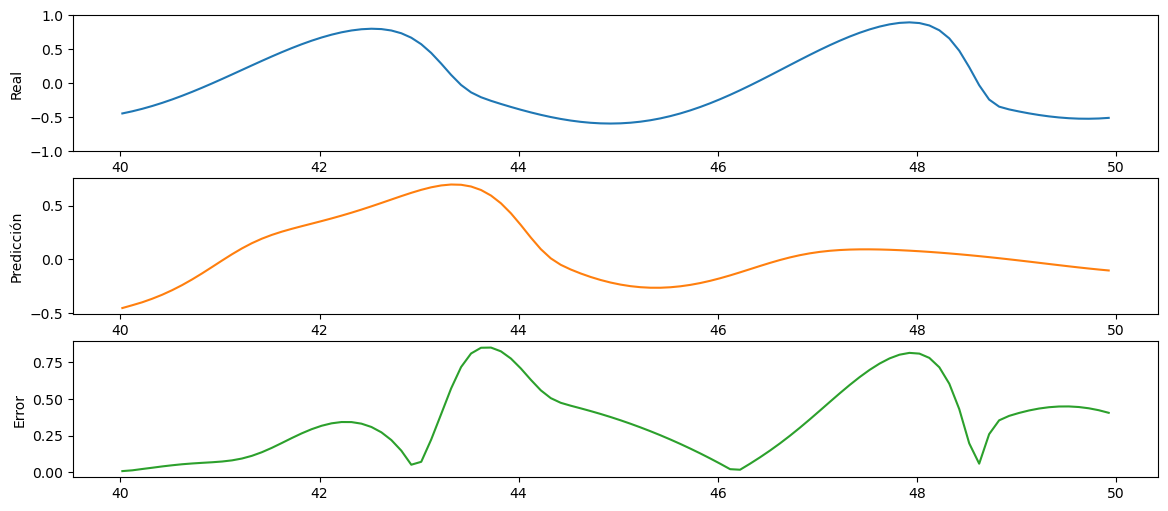

In [21]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(ts_1,valores_reales_1)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(ts_1,predicciones_adelante_1,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(ts_1,diferencia_1,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

In [22]:
y_train_2_bw, y_test_2_bw, predicciones_adelante_2_bw,valores_reales_2_bw = make_predictions(raw_seq_2_bw, look_back, n_features, pasos_adelante, indice_inicial, proporcion)

y_train_2 = y_train_2_bw[::-1]
y_test_2 = y_test_2_bw[::-1]
predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
valores_reales_2 = valores_reales_2_bw[::-1]

# Calculamos el error
ts_2 = t_2[indice_inicial:indice_inicial+pasos_adelante]
diferencia_2 = np.abs(predicciones_adelante_2-valores_reales_2)

1/1 [==============================] - 0s 26ms/step


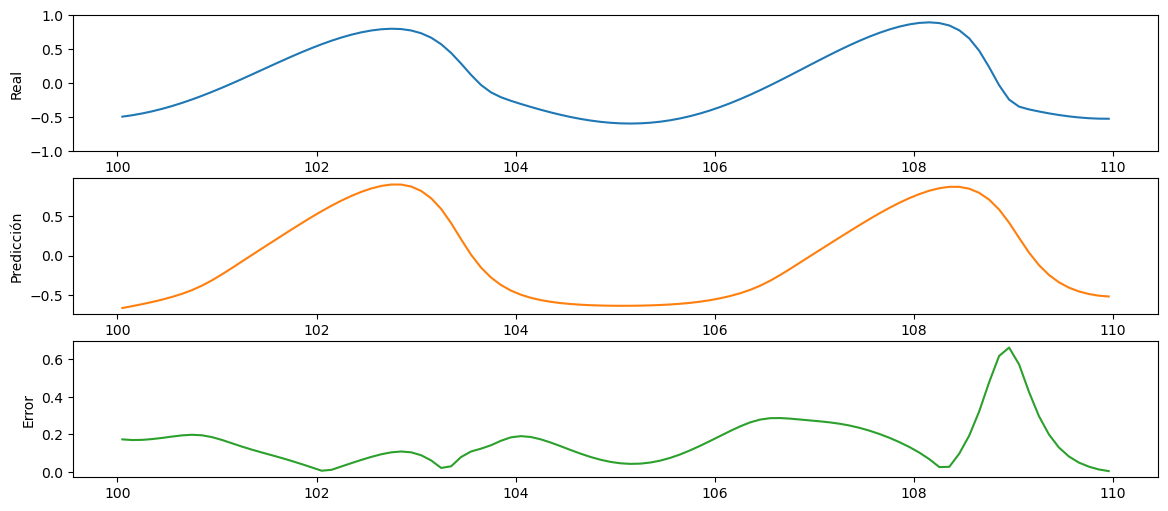

In [23]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(ts_2,valores_reales_2)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(ts_2,predicciones_adelante_2,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(ts_2,diferencia_2,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

In [24]:
print(len(t_1))
print(len(ts_1))
print(len(valores_reales_1))
print(len(predicciones_adelante_1))
print(indice_inicial)
print(pasos_adelante)
print(len(y_test_1))

1000
100
100
100
0
100
249


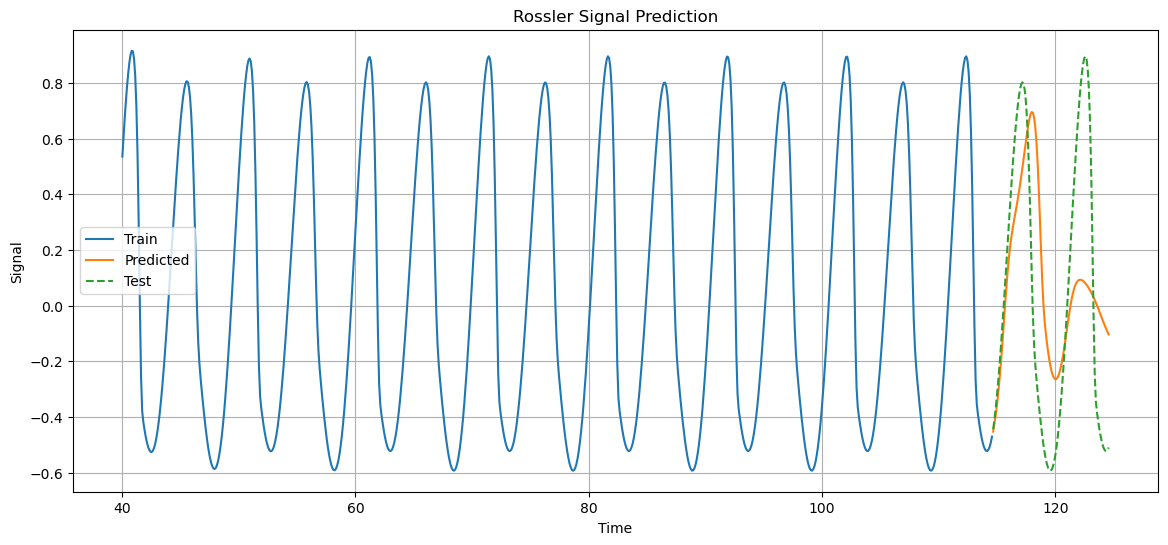

In [31]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1[:len(y_train_1)],y_train_1,label='Train')
plt.plot(t_1[len(y_train_1): len(y_train_1)+len(predicciones_adelante_1)],predicciones_adelante_1,label='Predicted')
plt.plot(t_1[len(y_train_1): len(y_train_1)+len(predicciones_adelante_1)],valores_reales_1,'--',label='Test')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_1.png')
plt.show()


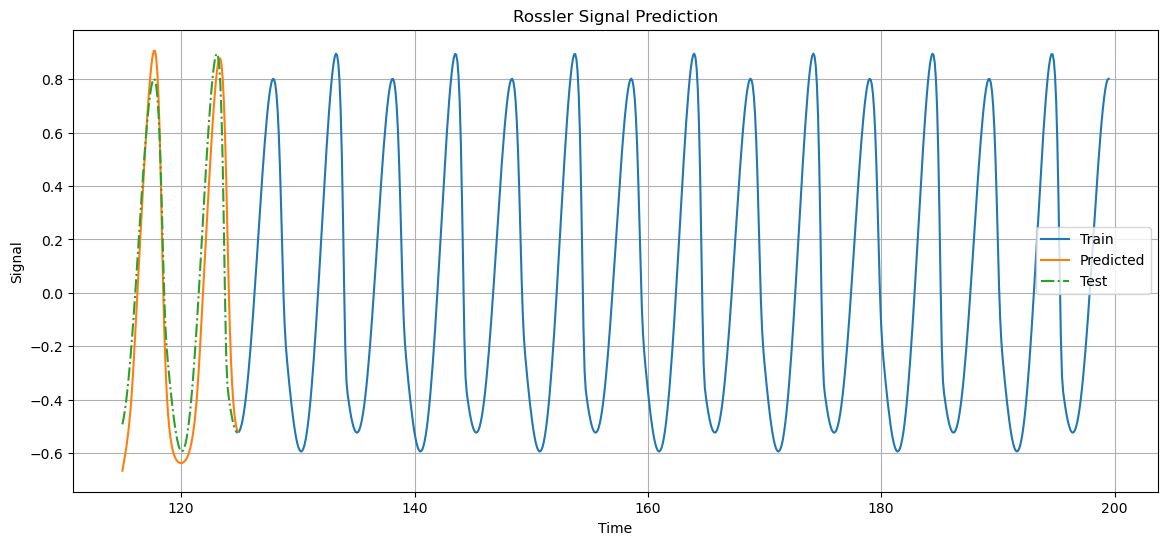

In [32]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_2[len(y_test_2):len(y_test_2)+len(y_train_2)],y_train_2,label='Train')
plt.plot(t_2[len(y_test_2)-len(predicciones_adelante_2):len(y_test_2)], predicciones_adelante_2,label='Predicted')
plt.plot(t_2[len(y_test_2)-len(predicciones_adelante_2):len(y_test_2)], valores_reales_2, '-.',label='Test')    
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_2.png')
plt.show()

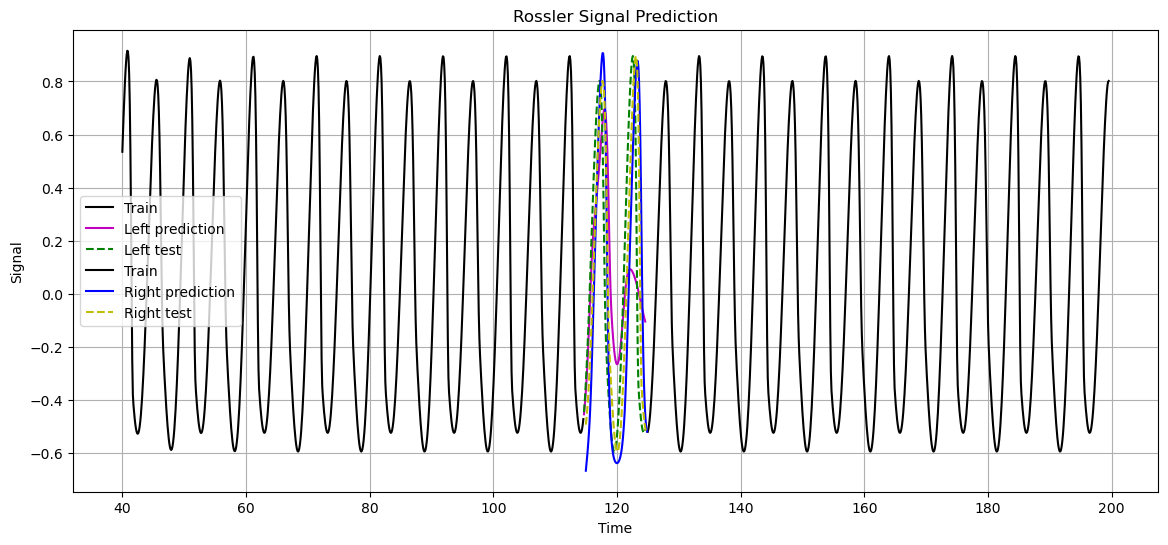

In [33]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1[:len(y_train_1)],y_train_1,'k',label='Train')
plt.plot(t_1[len(y_train_1): len(y_train_1)+len(predicciones_adelante_1)],predicciones_adelante_1,'m',label='Left prediction')
plt.plot(t_1[len(y_train_1): len(y_train_1)+len(predicciones_adelante_1)],valores_reales_1,'--g',label='Left test')


plt.plot(t_2[len(y_test_2):len(y_test_2)+len(y_train_2)],y_train_2,'k',label='Train')
plt.plot(t_2[len(y_test_2)-len(predicciones_adelante_2):len(y_test_2)], predicciones_adelante_2,'b',label='Right prediction')
plt.plot(t_2[len(y_test_2)-len(predicciones_adelante_2):len(y_test_2)], valores_reales_2, '--y',label='Right test')    

plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_3.png')
plt.show()


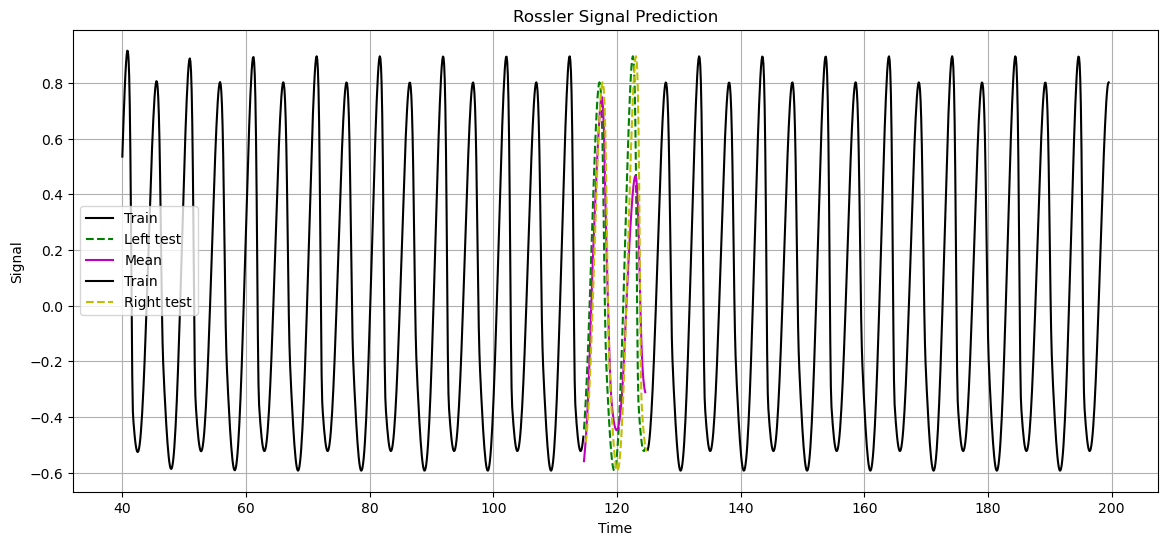

In [35]:
prediction_mean = (predicciones_adelante_1 + predicciones_adelante_2)/2

fig = plt.figure(figsize = (14,6))
plt.plot(t_1[:len(y_train_1)],y_train_1,'k',label='Train')
plt.plot(t_1[len(y_train_1): len(y_train_1)+len(predicciones_adelante_1)],valores_reales_1,'--g',label='Left test')
plt.plot(t_1[len(y_train_1): len(y_train_1)+len(predicciones_adelante_1)],prediction_mean,'m',label='Mean')
plt.plot(t_2[len(y_test_2):len(y_test_2)+len(y_train_2)],y_train_2,'k',label='Train')
plt.plot(t_2[len(y_test_2)-len(predicciones_adelante_2):len(y_test_2)], valores_reales_2, '--y',label='Right test')    

plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Rossler Signal Prediction')
plt.legend()
plt.savefig('figures/rossler_signal_prediction_mean.png')
plt.show()


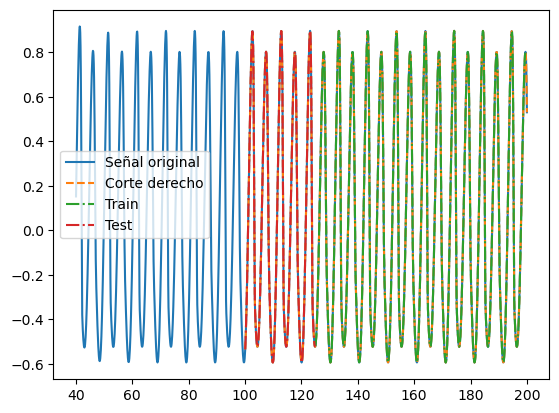

In [28]:
plt.plot(t,raw_seq, label='Señal original')
plt.plot(t_2,raw_seq_2, '--', label='Corte derecho')
plt.plot(t_2[len(y_test_2):len(y_test_2)+len(y_train_2)],y_train_2, '-.',label='Train') 
plt.plot(t_2[:len(y_test_2)],y_test_2, '-.',label='Test')
plt.legend()
